In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
from spectres import spectres
from scipy.constants import c as speed_of_light
from tqdm import tqdm
import prodimopy.read as pread
from numba import njit
from scipy.stats import kendalltau, spearmanr, pearsonr
from scipy.signal import correlate, fftconvolve
from scipy.optimize import minimize

In [ ]:
def add_noise(flux, SNR, seed=None):
    """
    SNR = flux/sigma
    """
    if seed is not None:
        np.random.seed(seed)
    noise_level = np.min(flux) / SNR
    noise = np.random.normal(0, noise_level, size=flux.shape)
    return flux + noise

In [70]:
gdr = '1000_N'
with open(f'NH3_flux{gdr}.pkl', 'rb') as f:
    df = pickle.load(f)

In [65]:
# gdr = '100'
# data = []
# for model_index in tqdm(range(24)):
#     model_data = []
#     model_flits = pread.read_FLiTs(f'gdr_{gdr}/' + df['Model Name'][model_index], filename='specFLiTs1.out')
#     wl, flux_without_NH3, flux_cont = model_flits.convolve(3000, contReturn=True)
#
#     NH3_flits = pread.read_FLiTs(f'gdr_{gdr}/{df['Model Name'][model_index]}', filename=f'specFLiTs1_NH3.out')
#     NH3_wl, NH3_flux, NH3_flux_cont = NH3_flits.convolve(3000, contReturn=True)
#     NH3_flux = np.interp(wl, NH3_wl, NH3_flux)
#     NH3_flux_cont = np.interp(wl, NH3_wl, NH3_flux_cont)
#
#     wl_uniform = np.linspace(min(wl), max(wl), len(wl))
#     flux_without_NH3_uniform = np.interp(wl_uniform, wl, flux_without_NH3)
#     flux_cont_uniform = np.interp(wl_uniform, wl, flux_cont)
#     NH3_flux_uniform = np.interp(wl_uniform, wl, NH3_flux)
#     NH3_flux_cont_uniform = np.interp(wl_uniform, wl, NH3_flux_cont)
#     NH3_flux_uniform -= NH3_flux_cont_uniform
#
#     model_data.append(wl_uniform)
#     model_data.append(NH3_flux_uniform)
#     model_data.append(flux_without_NH3_uniform)
#     model_data.append(flux_cont_uniform)
#     data.append(model_data)
# df = pd.DataFrame(data, columns=['Wavelength', 'NH3 Flux', 'Total Flux', 'Continuum'])
# with open(f'NH3_flux{gdr}.pkl', 'wb') as f:
#     pickle.dump(df, f)

  0%|          | 0/24 [00:00<?, ?it/s]

READ: Reading File:  gdr_100/C_-0.5_O_-0.5_CO_0.45\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.5_O_-0.5_CO_0.45\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


  4%|▍         | 1/24 [00:01<00:43,  1.90s/it]

READ: Reading File:  gdr_100/C_-0.5_O_-0.25_CO_0.2570\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.5_O_-0.25_CO_0.2570\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


  8%|▊         | 2/24 [00:03<00:41,  1.86s/it]

READ: Reading File:  gdr_100/C_-0.5_O_0.0_CO_0.145\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.5_O_0.0_CO_0.145\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 12%|█▎        | 3/24 [00:05<00:39,  1.87s/it]

READ: Reading File:  gdr_100/C_-0.5_O_0.25_CO_0.0813\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.5_O_0.25_CO_0.0813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 17%|█▋        | 4/24 [00:07<00:37,  1.89s/it]

READ: Reading File:  gdr_100/C_-0.5_O_0.5_CO_0.045\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.5_O_0.5_CO_0.045\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 21%|██        | 5/24 [00:09<00:36,  1.90s/it]

READ: Reading File:  gdr_100/C_-0.25_O_-0.5_CO_0.813\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.25_O_-0.5_CO_0.813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 25%|██▌       | 6/24 [00:11<00:34,  1.92s/it]

READ: Reading File:  gdr_100/C_-0.25_O_-0.25_CO_0.45\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.25_O_-0.25_CO_0.45\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 29%|██▉       | 7/24 [00:13<00:32,  1.92s/it]

READ: Reading File:  gdr_100/C_-0.25_O_0.0_CO_0.257\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.25_O_0.0_CO_0.257\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 33%|███▎      | 8/24 [00:15<00:30,  1.92s/it]

READ: Reading File:  gdr_100/C_-0.25_O_0.25_CO_0.145\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.25_O_0.25_CO_0.145\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 38%|███▊      | 9/24 [00:17<00:28,  1.92s/it]

READ: Reading File:  gdr_100/C_-0.25_O_0.5_CO_0.0813\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_-0.25_O_0.5_CO_0.0813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 42%|████▏     | 10/24 [00:19<00:26,  1.92s/it]

READ: Reading File:  gdr_100/C_0.0_O_-0.5_CO_1.445\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.0_O_-0.5_CO_1.445\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 46%|████▌     | 11/24 [00:21<00:24,  1.92s/it]

READ: Reading File:  gdr_100/C_0.0_O_-0.25_CO_0.813\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.0_O_-0.25_CO_0.813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 50%|█████     | 12/24 [00:22<00:23,  1.92s/it]

READ: Reading File:  gdr_100/C_0.0_O_0.0_CO_0.45\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.0_O_0.0_CO_0.45\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 54%|█████▍    | 13/24 [00:24<00:21,  1.93s/it]

READ: Reading File:  gdr_100/C_0.0_O_0.25_CO_0.257\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.0_O_0.25_CO_0.257\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 58%|█████▊    | 14/24 [00:26<00:19,  1.93s/it]

READ: Reading File:  gdr_100/C_0.0_O_0.5_CO_0.145\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.0_O_0.5_CO_0.145\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 62%|██████▎   | 15/24 [00:28<00:17,  1.93s/it]

READ: Reading File:  gdr_100/C_0.25_O_-0.5_CO_2.570\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.25_O_-0.5_CO_2.570\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 67%|██████▋   | 16/24 [00:30<00:15,  1.93s/it]

READ: Reading File:  gdr_100/C_0.25_O_-0.25_CO_1.445\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.25_O_-0.25_CO_1.445\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 71%|███████   | 17/24 [00:32<00:13,  1.93s/it]

READ: Reading File:  gdr_100/C_0.25_O_0.0_CO_0.813\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.25_O_0.0_CO_0.813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 75%|███████▌  | 18/24 [00:34<00:11,  1.92s/it]

READ: Reading File:  gdr_100/C_0.25_O_0.25_CO_0.45\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.25_O_0.25_CO_0.45\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 79%|███████▉  | 19/24 [00:36<00:09,  1.92s/it]

READ: Reading File:  gdr_100/C_0.25_O_0.5_CO_0.2570\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.25_O_0.5_CO_0.2570\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 83%|████████▎ | 20/24 [00:38<00:07,  1.92s/it]

READ: Reading File:  gdr_100/C_0.5_O_-0.5_CO_4.57\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.5_O_-0.5_CO_4.57\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 88%|████████▊ | 21/24 [00:40<00:05,  1.92s/it]

READ: Reading File:  gdr_100/C_0.5_O_-0.25_CO_2.570\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.5_O_-0.25_CO_2.570\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 92%|█████████▏| 22/24 [00:42<00:03,  1.91s/it]

READ: Reading File:  gdr_100/C_0.5_O_0.0_CO_1.445\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.5_O_0.0_CO_1.445\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


 96%|█████████▌| 23/24 [00:44<00:01,  1.91s/it]

READ: Reading File:  gdr_100/C_0.5_O_0.25_CO_0.813\specFLiTs1.out  ...
INFO: convolve FLiTs spectrum ... 
READ: Reading File:  gdr_100/C_0.5_O_0.25_CO_0.813\specFLiTs1_NH3.out  ...
INFO: convolve FLiTs spectrum ... 


100%|██████████| 24/24 [00:45<00:00,  1.92s/it]


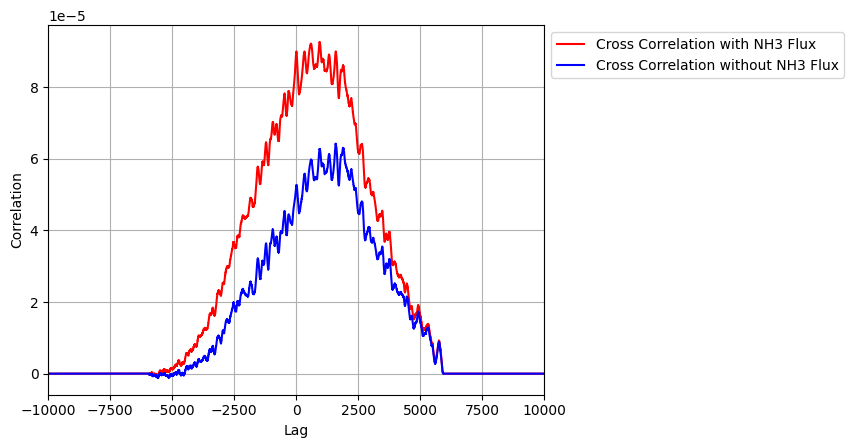

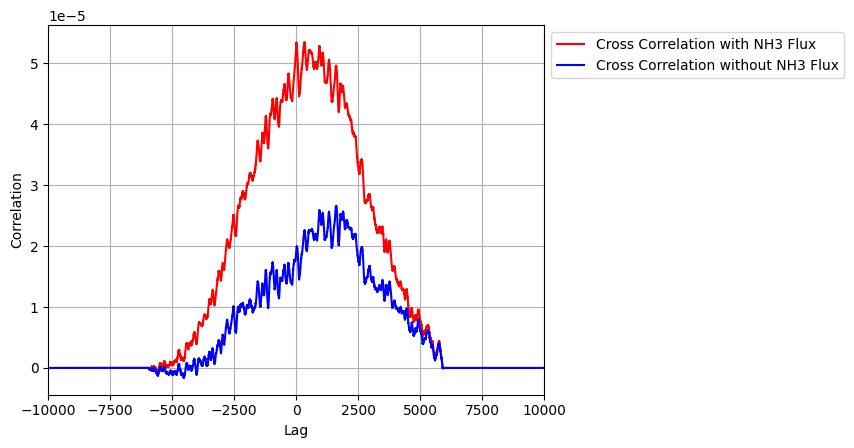

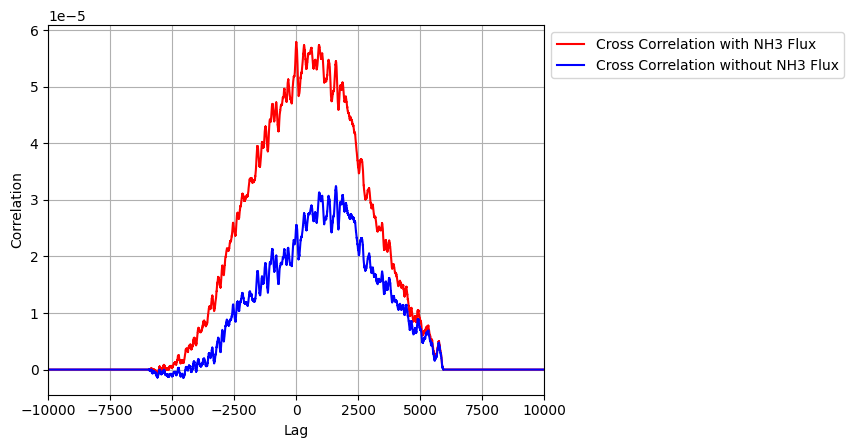

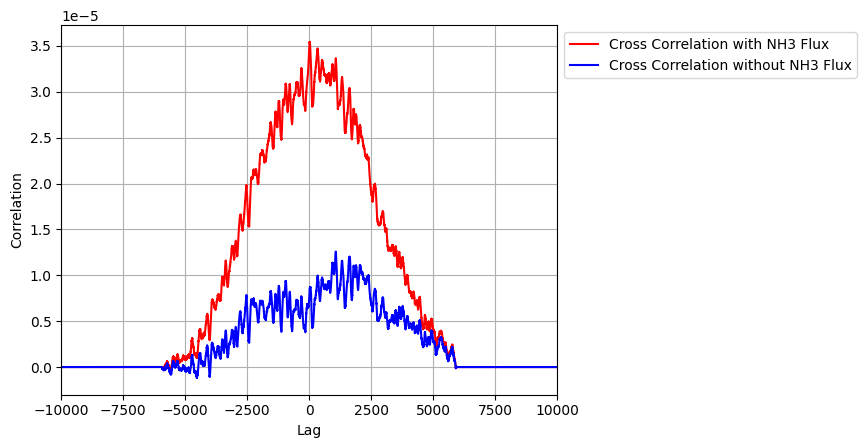

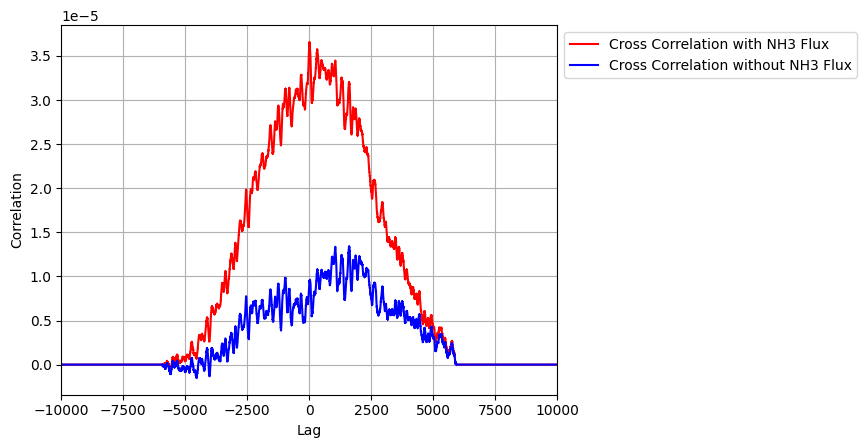

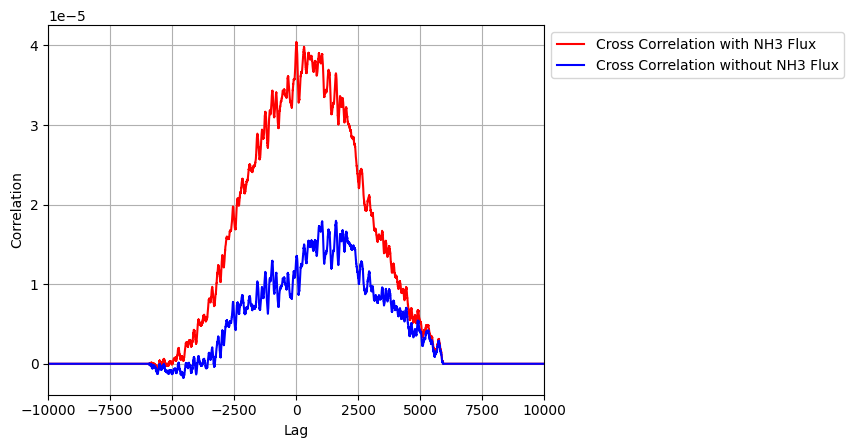

In [71]:
params = [6.0450756, 6.3024475, 0.1]
for i, row in df.iterrows():
    if i not in [10, 15, 16, 20, 21, 22]:
        continue
    new_noise_wout_NH3_flux = add_noise(row['Total Flux'], 300, seed=42).copy()
    new_NH3_flux = row['NH3 Flux'].copy()
    new_noise_flux = new_NH3_flux + new_noise_wout_NH3_flux.copy()
    new_noise_flux -= row['Continuum'].copy()
    new_noise_wout_NH3_flux -= row['Continuum'].copy()
    wl_uniform = row['Wavelength'].copy()

    # plt.plot(wl_uniform, new_noise_flux*1000)
    # plt.plot(wl_uniform, new_noise_wout_NH3_flux*1000)
    # plt.xlim(6,6.4)
    # plt.ylim(0,5)
    # plt.show()
    wl_mask = (wl_uniform < params[0]) | (wl_uniform > params[1])
    flux_treshold = params[2]

    new_noise_flux[wl_mask] = 0
    new_noise_flux[new_noise_flux > flux_treshold] = 0
    new_NH3_flux[wl_mask] = 0
    # new_NH3_flux[new_NH3_flux>flux_treshold] = 0
    new_noise_wout_NH3_flux[wl_mask] = 0
    new_noise_wout_NH3_flux[new_noise_wout_NH3_flux > flux_treshold] = 0

    cc_with = fftconvolve((new_NH3_flux), (new_noise_flux)[::-1], mode='full')
    cc_without = fftconvolve((new_NH3_flux), (new_noise_wout_NH3_flux)[::-1], mode='full')
    # Comparing the crosscorrelations for the signals with and without NH3
    lags = np.arange(-len(new_NH3_flux) + 1, len(new_noise_flux))
    plt.plot(lags, cc_with, label='Cross Correlation with NH3 Flux', c='r')
    plt.plot(lags, cc_without, label='Cross Correlation without NH3 Flux', c='b')
    # plt.plot(wl_uniform, new_noise_flux, label=i)
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlim(-10000, 10000)
plt.show()

In [101]:
def difference(params):
    error = 0
    a,b,c = params
    for i, row in df.iterrows():
        if i in [10, 15, 16, 20, 21, 22]:
            continue
        new_noise_wout_NH3_flux = add_noise(row['Total Flux'], 300, seed=42).copy()
        new_NH3_flux = row['NH3 Flux'].copy()
        new_noise_flux = new_NH3_flux + new_noise_wout_NH3_flux.copy()
        new_noise_flux -= row['Continuum'].copy()
        new_noise_wout_NH3_flux -= row['Continuum'].copy()
        wl_uniform = row['Wavelength'].copy()

        # plt.plot(wl_uniform, new_noise_flux*1000)
        # plt.plot(wl_uniform, new_noise_wout_NH3_flux*1000)
        # plt.xlim(6,6.4)
        # plt.ylim(0,5)
        # plt.show()
        wl_mask = (wl_uniform < a) | (wl_uniform > b)
        flux_treshold = c

        new_noise_flux[wl_mask] = 0
        new_noise_flux[new_noise_flux > flux_treshold] = 0
        new_NH3_flux[wl_mask] = 0
        # new_NH3_flux[new_NH3_flux>flux_treshold] = 0
        new_noise_wout_NH3_flux[wl_mask] = 0
        new_noise_wout_NH3_flux[new_noise_wout_NH3_flux > flux_treshold] = 0

        lags = np.arange(-len(new_NH3_flux) + 1, len(new_noise_flux))
        cc_with = fftconvolve((new_NH3_flux), (new_noise_flux)[::-1], mode='full')
        cc_without = fftconvolve((new_NH3_flux), (new_noise_wout_NH3_flux)[::-1], mode='full')
        error -= abs(cc_with[lags==0]-cc_without[lags==0])/(b-a+1)
    return error

initial_guess = [11.78, 17.81, 0.2]

result = minimize(difference, initial_guess, method='Nelder-Mead')

best_params = result.x
print(best_params)

[11.97504947 14.1052669   0.23055629]


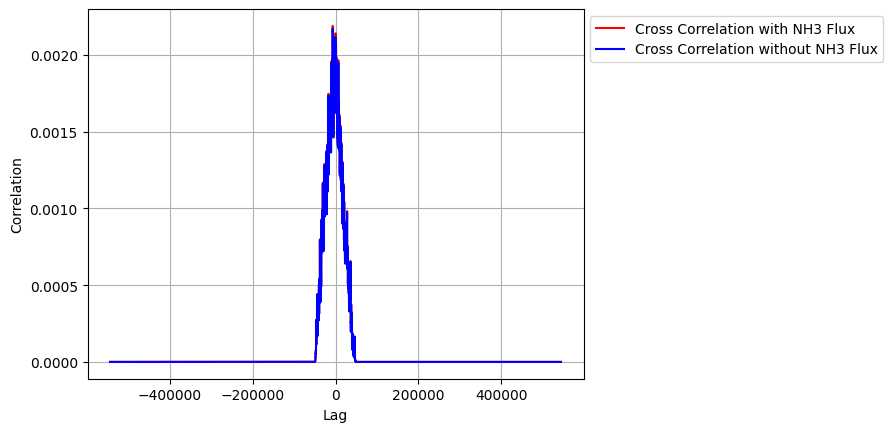

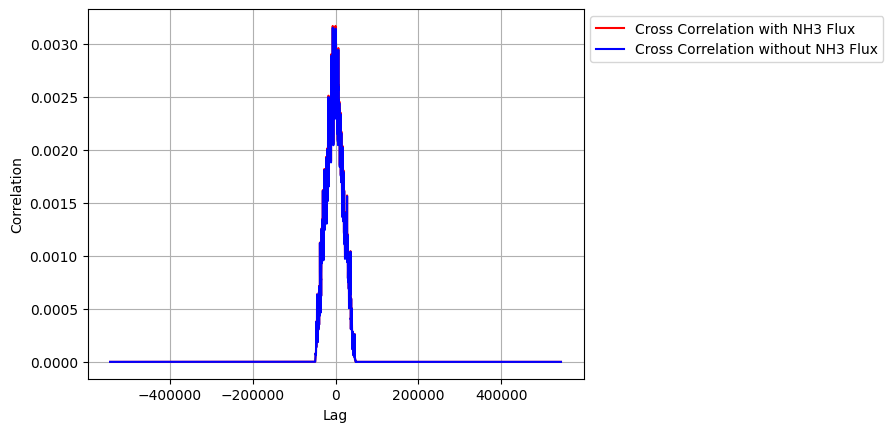

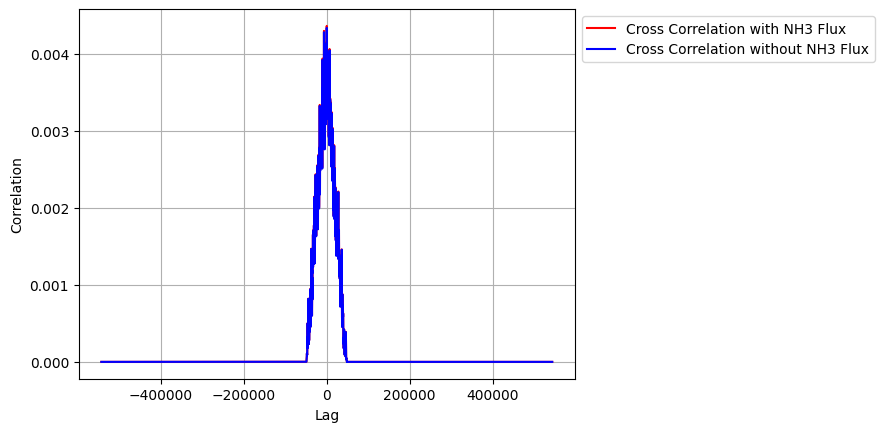

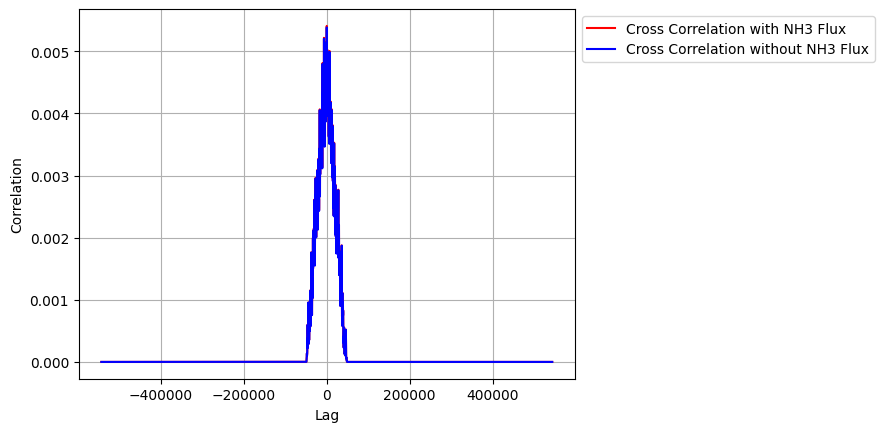

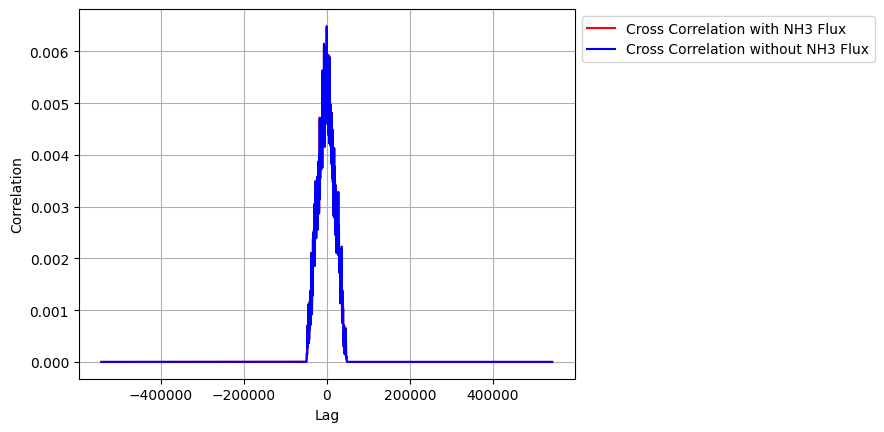

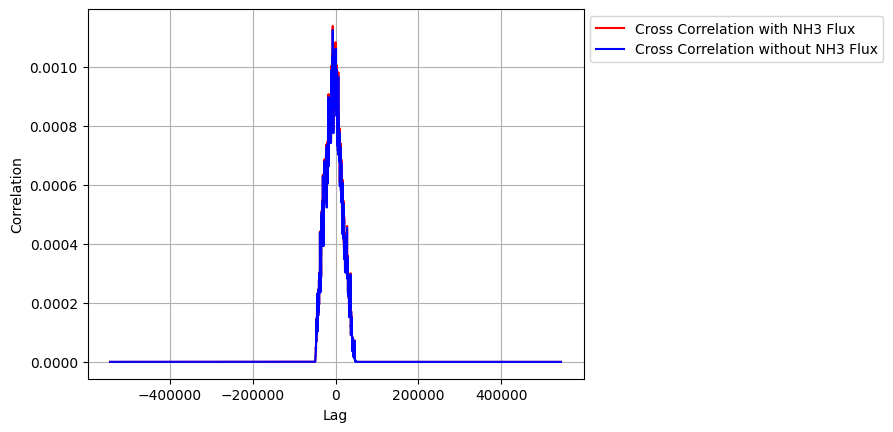

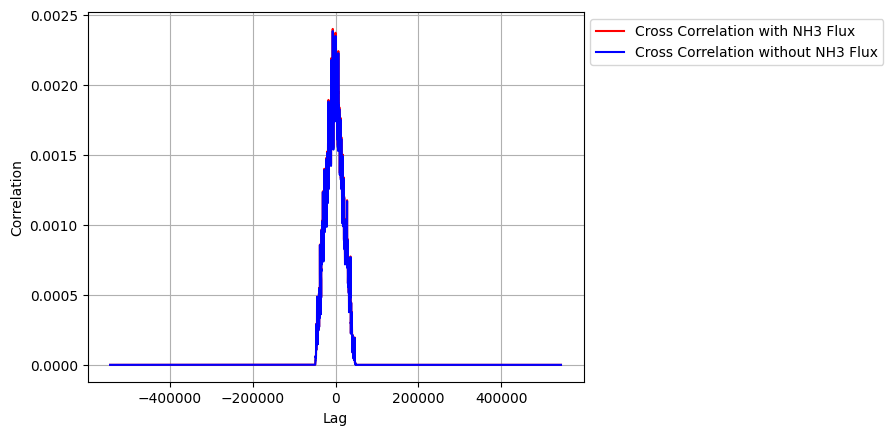

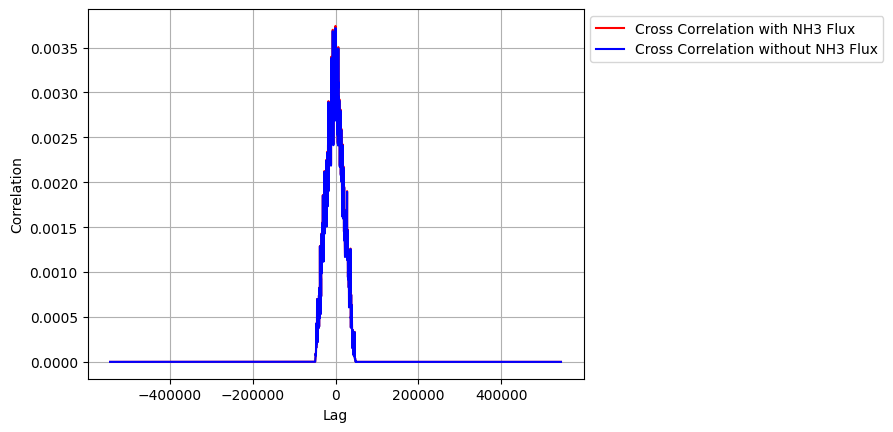

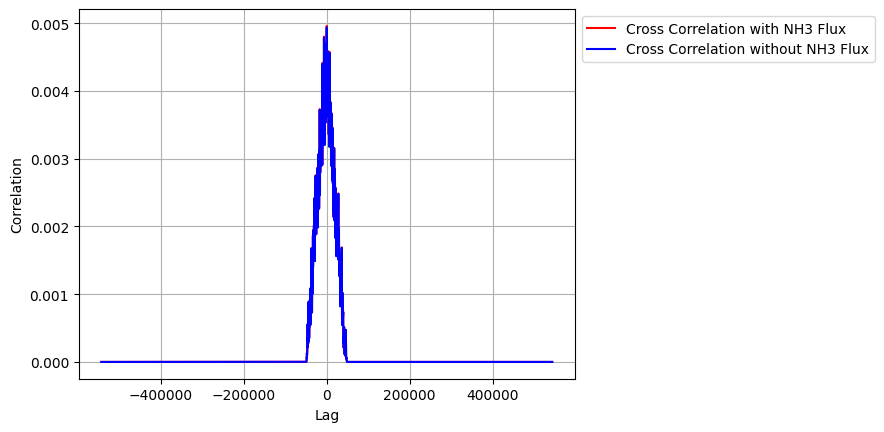

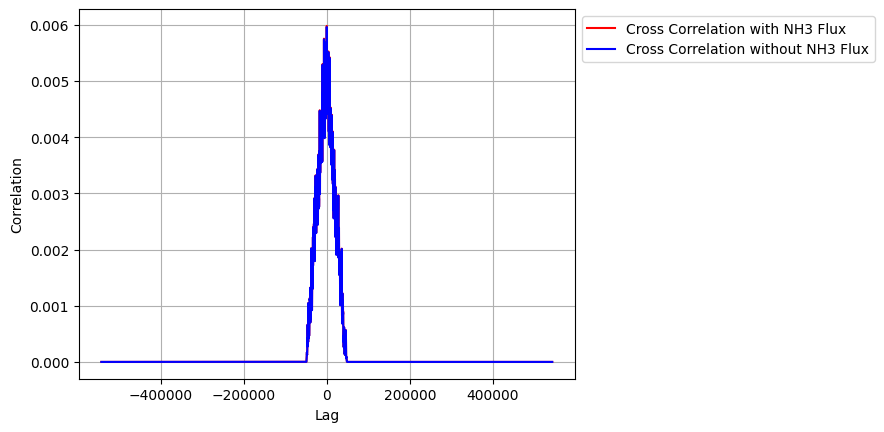

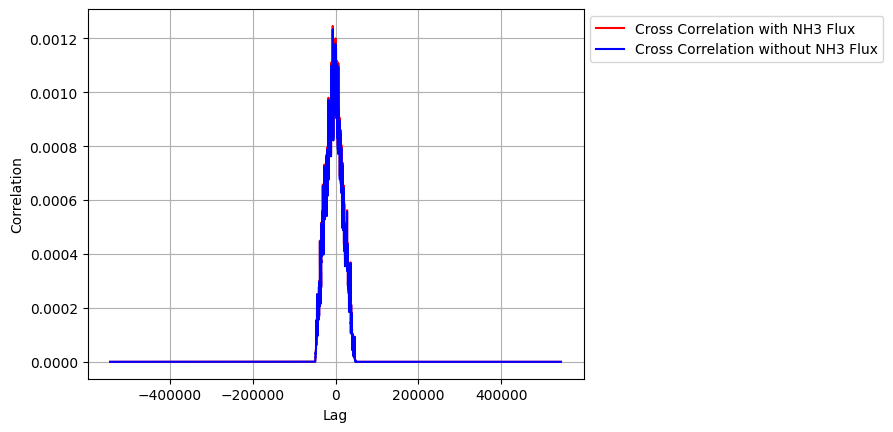

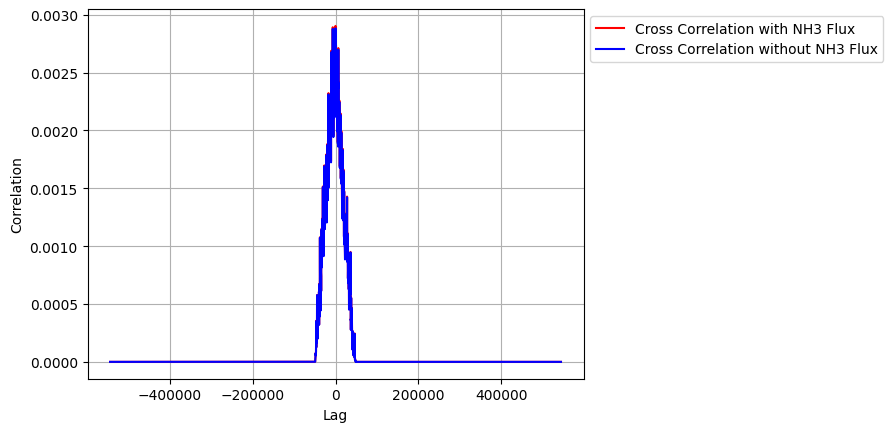

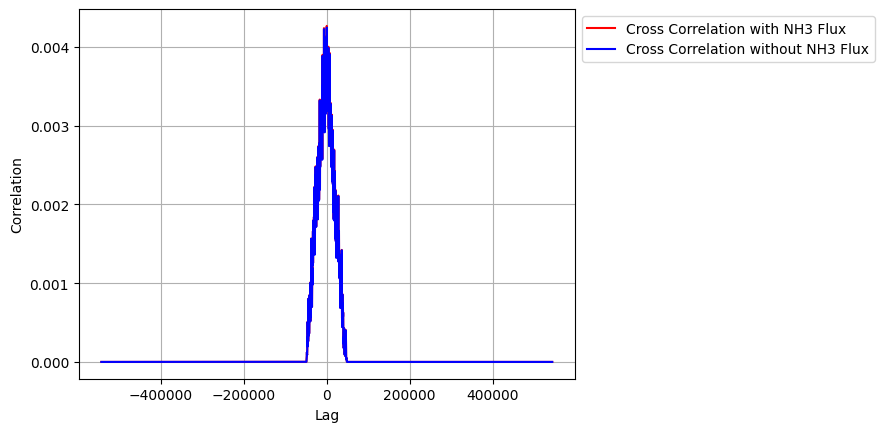

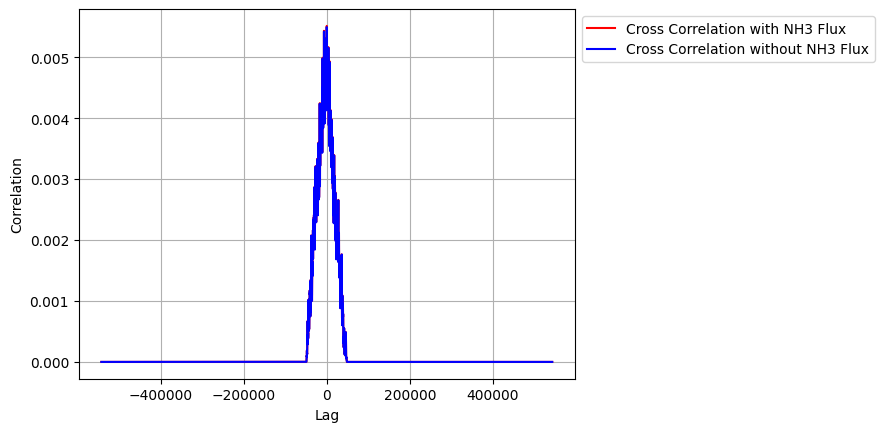

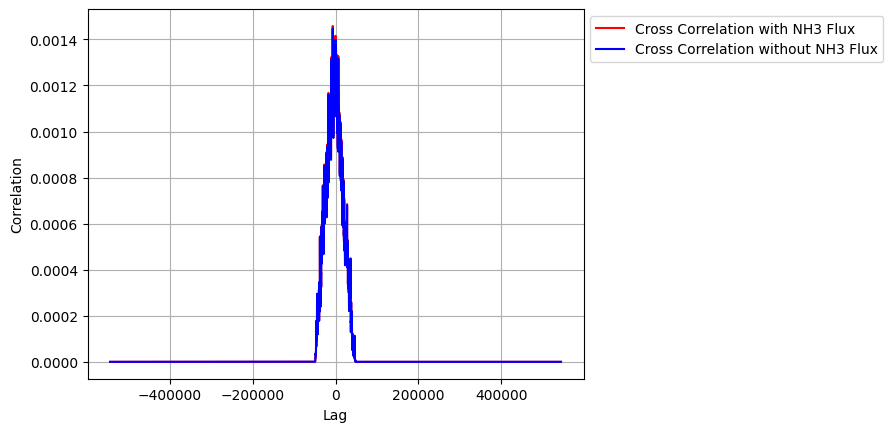

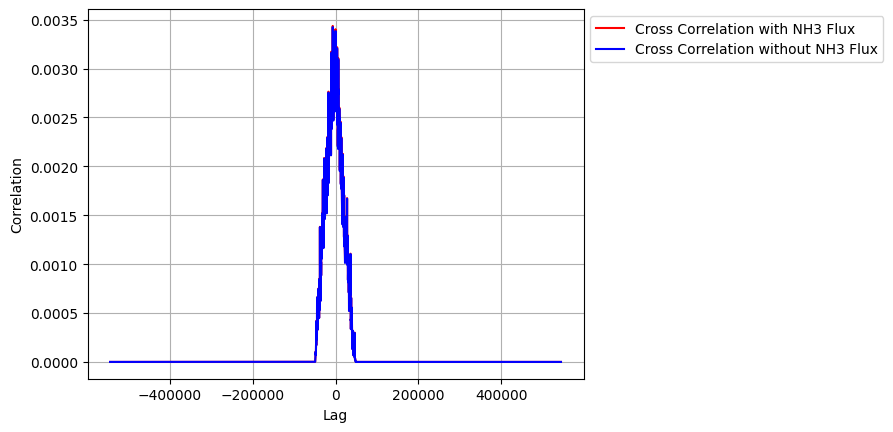

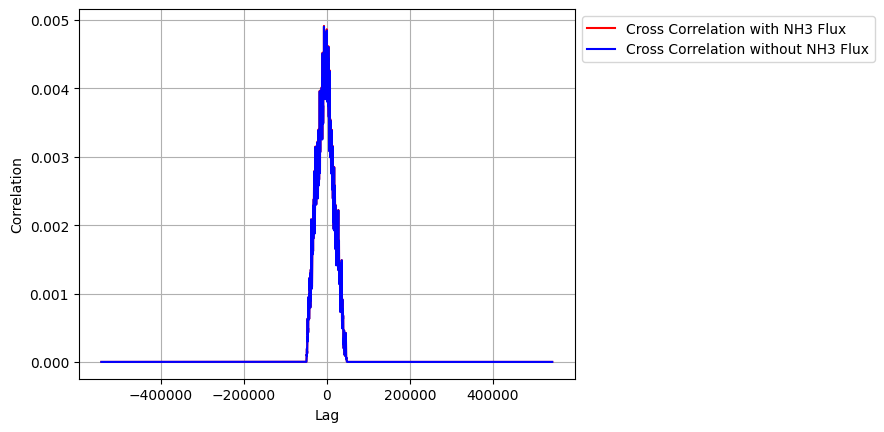

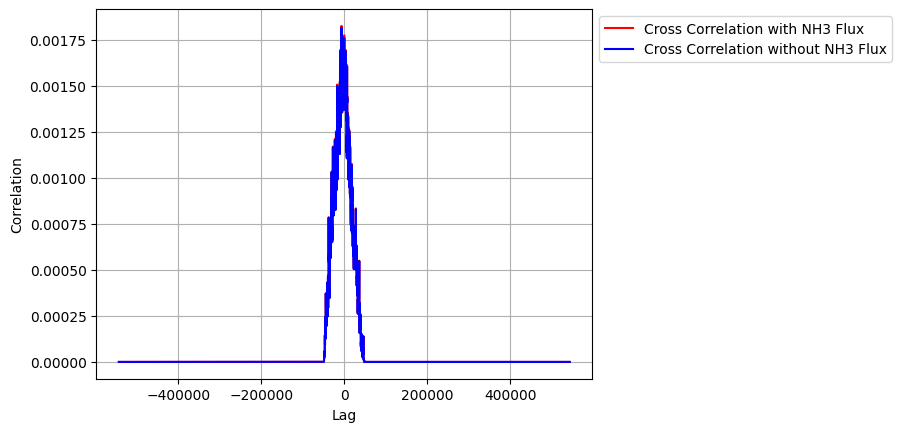

In [99]:
params = best_params
for i, row in df.iterrows():
    if i in [10, 15, 16, 20, 21, 22]:
        continue
    new_noise_wout_NH3_flux = add_noise(row['Total Flux'], 300, seed=42).copy()
    new_NH3_flux = row['NH3 Flux'].copy()
    new_noise_flux = new_NH3_flux + new_noise_wout_NH3_flux.copy()
    new_noise_flux -= row['Continuum'].copy()
    new_noise_wout_NH3_flux -= row['Continuum'].copy()
    wl_uniform = row['Wavelength'].copy()

    # plt.plot(wl_uniform, new_noise_flux*1000)
    # plt.plot(wl_uniform, new_noise_wout_NH3_flux*1000)
    # plt.xlim(6,6.4)
    # plt.ylim(0,5)
    # plt.show()
    wl_mask = (wl_uniform < params[0]) | (wl_uniform > params[1])
    flux_treshold = params[2]

    new_noise_flux[wl_mask] = 0
    new_noise_flux[new_noise_flux > flux_treshold] = 0
    new_NH3_flux[wl_mask] = 0
    # new_NH3_flux[new_NH3_flux>flux_treshold] = 0
    new_noise_wout_NH3_flux[wl_mask] = 0
    new_noise_wout_NH3_flux[new_noise_wout_NH3_flux > flux_treshold] = 0

    cc_with = fftconvolve((new_NH3_flux), (new_noise_flux)[::-1], mode='full')
    cc_without = fftconvolve((new_NH3_flux), (new_noise_wout_NH3_flux)[::-1], mode='full')
    # Comparing the crosscorrelations for the signals with and without NH3
    lags = np.arange(-len(new_NH3_flux) + 1, len(new_noise_flux))
    plt.plot(lags, cc_with, label='Cross Correlation with NH3 Flux', c='r')
    plt.plot(lags, cc_without, label='Cross Correlation without NH3 Flux', c='b')
    # plt.plot(wl_uniform, new_noise_flux, label=i)
    plt.xlabel("Lag")
    plt.ylabel("Correlation")
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.xlim(-10000, 10000)
    plt.show()